<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/%C3%81rbol_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 2. Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/Maching learning/Regresión: Valor numérico/datos_exportados (1).csv', sep=',')
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,-1.635805,1,0,1.034768,-1.639025,-1.499328,0,0,1,0,...,0.651796,0.0,-0.525208,0.0,-0.467114,-1.096998,-0.746021,-0.057794,-1.034344,-0.953251
1,-1.635527,1,0,1.034768,-1.639025,-1.360937,0,0,1,0,...,-0.787437,0.0,-0.525208,0.0,1.075329,-0.321510,-0.746021,-0.057794,-1.034344,-0.953251
2,-1.635499,1,0,1.034768,-1.639025,-1.360937,1,0,1,0,...,-0.787437,0.0,-0.525208,0.0,-0.852724,-0.321510,-1.096610,-0.854388,-0.436178,-0.621756
3,-1.635471,1,1,-0.966401,-1.639025,-1.222547,2,1,0,0,...,-0.787437,0.0,-0.525208,0.0,-0.698480,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746
4,-1.635443,1,1,-0.966401,-1.639025,-1.222547,2,1,0,0,...,-0.787437,0.0,-0.525208,0.0,-0.158625,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746


In [ ]:
# 3. Definir las variables predictoras y la variable objetivo
columnas_predictoras = [
    'MatchKills',
    'MatchHeadshots',
    'TravelledDistance',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue'
]

X = df[columnas_predictoras]
y = df['Survived']

In [ ]:
# 4. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 5. Crear y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limitar la profundidad para mejor visualización
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# 6. Predecir
y_pred = modelo_arbol.predict(X_test)

In [ ]:
# 7. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (accuracy):", accuracy)

Precisión (accuracy): 0.6280693849966209


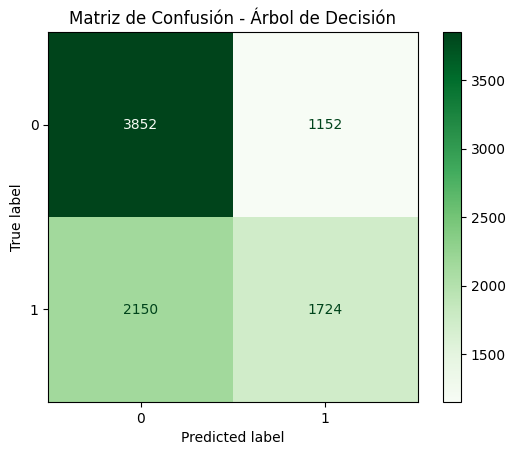

In [ ]:
# 8. Matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=modelo_arbol.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

📌 ¿Qué significa?

El modelo acertó 3.852 veces cuando dijo que el jugador no sobreviviría.

Acertó 1.724 veces cuando dijo que el jugador sí sobreviviría.

Cometió 2.150 errores al decir que no sobrevivía, pero sí lo hizo.

Cometió 1.152 errores al decir que sí sobrevivía, pero no lo hizo.

📈 Probablemente tu accuracy (precisión) está cerca de 62% – 63%, lo que mejoró un poco respecto a la Regresión Logística (que estaba en 61%).

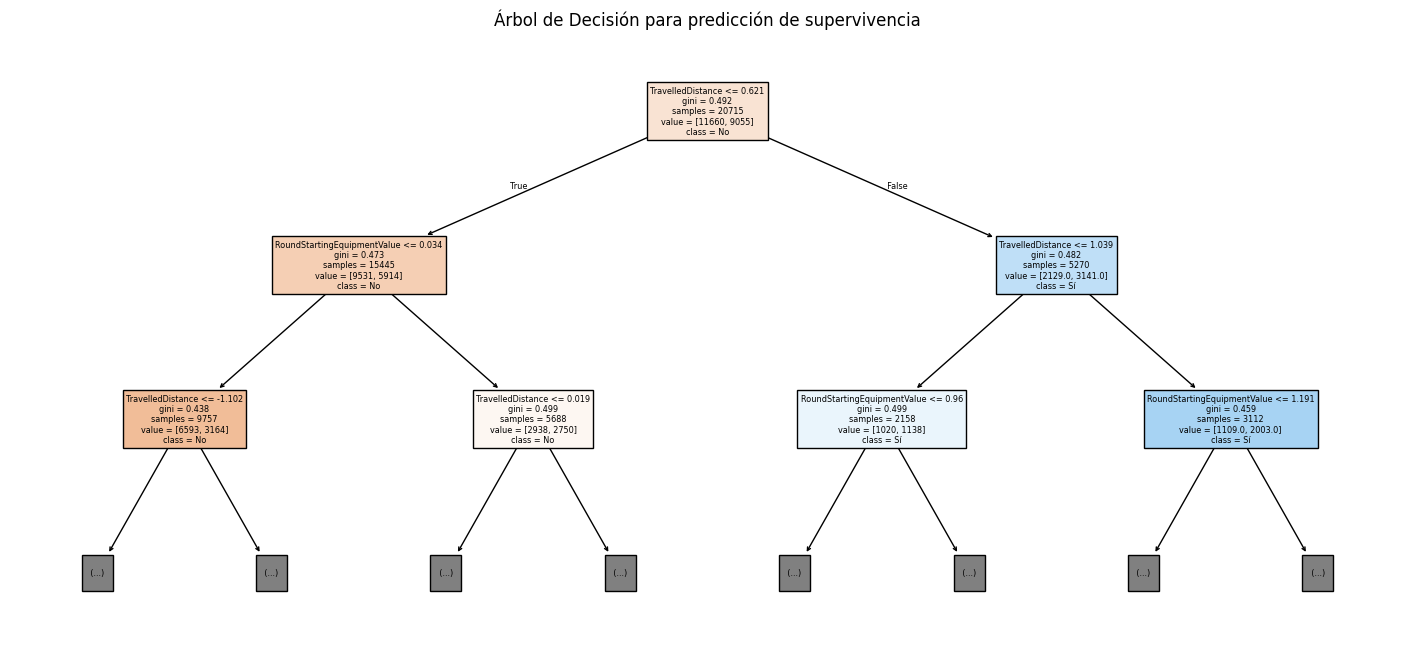

In [ ]:
# 9. Visualizar el árbol
plt.figure(figsize=(18, 8))  # más grande y horizontal
plot_tree(modelo_arbol,
          feature_names=columnas_predictoras,
          class_names=['No', 'Sí'],
          filled=True,
          max_depth=2)  # Limita a 3 niveles para que se entienda
plt.title('Árbol de Decisión para predicción de supervivencia')
plt.show()


🌳 Árbol de Decisión (visualización)
El árbol es la representación visual de las reglas que el modelo aprendió para decidir si un jugador sobrevive o no.

Cada "bloque" es una pregunta como:

¿TravelledDistance ≤ 1.3?

Si la respuesta es sí, baja por la izquierda.

Si es no, va por la derecha.

**CONCLUSIÓN**

“A diferencia del modelo anterior, el Árbol de Decisión mejoró un poco la precisión.
Lo interesante es que este modelo nos permite ver gráficamente cómo toma las decisiones, con base en preguntas como:
'¿Recorrió poca distancia?' o '¿Tenía mejor equipamiento?'.
Esto nos ayuda a entender qué factores influyen más en la supervivencia del jugador.”